## Employee Attrition Prediction Using Machine Learning Decision Trees

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Exploratory Data Analysis (EDA)

This section loads the Employee Attrition Dataset which is made up of 1470 records and 35 features. In this section, duplicated and mising records were first checked, columns were all unified to lowercase for easy use. Data types for all the features were identifed and used this to divide them into numerical and categorical variables. AIt also includes a summary of statistics of the dataset for the different features which included the count, mean, min, max, quartile ranges. 
This section also includes some visualizations of the target variable and some independent variables. Investigations of the exporations of the target variable include the following; about 16% of employees are most likely to depart from work either voluntarily or involuntarily, the attrition rate is given by 16.1%.

In [2]:
# Loading the dataset
df = pd.read_csv('employee_attrition_dataset.csv')
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

In [3]:
# Checking for Duplicates
print(df.duplicated().value_counts())
df.drop_duplicates(inplace = True)
print(len(df))

False    1470
dtype: int64
1470


In [4]:
len(df), df.shape

(1470, (1470, 35))

In [5]:
# Viewing all coulmns as rows
df.head().T

0                       1  \
Age                                    41                      49   
Attrition                             Yes                      No   
BusinessTravel              Travel_Rarely       Travel_Frequently   
DailyRate                            1102                     279   
Department                          Sales  Research & Development   
DistanceFromHome                        1                       8   
Education                               2                       1   
EducationField              Life Sciences           Life Sciences   
EmployeeCount                           1                       1   
EmployeeNumber                          1                       2   
EnvironmentSatisfaction                 2                       3   
Gender                             Female                    Male   
HourlyRate                             94                      61   
JobInvolvement                          3                       2   
JobLevel                                2                       2   
JobRole                   Sales Executive      Research Scientist   
JobSatisfaction                         4                       2   
MaritalStatus                      Single                 Married   
MonthlyIncome                        5993                    5130   
MonthlyRate                         19479                   24907   
NumCompaniesWorked                      8                       1   
Over18                                  Y                       Y   
OverTime                              Yes                      No   
PercentSalaryHike                      11                      23   
PerformanceRating                       3                       4   
RelationshipSatisfaction                1                       4   
StandardHours                          80                      80   
StockOptionLevel                        0                       1   
TotalWorkingYears                       8                      10   
TrainingTimesLastYear                   0                       3   
WorkLifeBalance                         1                       3   
YearsAtCompany                          6                      10   
YearsInCurrentRole                      4                       7   
YearsSinceLastPromotion                 0                       1   
YearsWithCurrManager                    5                       7   

                                               2                       3  \
Age                                           37                      33   
Attrition                                    Yes                      No   
BusinessTravel                     Travel_Rarely       Travel_Frequently   
DailyRate                                   1373                    1392   
Department                Research & Development  Research & Development   
DistanceFromHome                               2                       3   
Education                                      2                       4   
EducationField                             Other           Life Sciences   
EmployeeCount                                  1                       1   
EmployeeNumber                                 4                       5   
EnvironmentSatisfaction                        4                       4   
Gender                                      Male                  Female   
HourlyRate                                    92                      56   
JobInvolvement                                 2                       3   
JobLevel                                       1                       1   
JobRole                    Laboratory Technician      Research Scientist   
JobSatisfaction                                3                       3   
MaritalStatus                             Single                 Married   
MonthlyIncome                               2090                    2909   
MonthlyRate                        

In [6]:
columns = df.columns
columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
# Making columns uniform by changing all of them to lowercase
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
for columns in categorical_columns:
    df[columns] = df[columns].str.lower().str.replace(' ', '_')

In [8]:
column_datatype = (df.dtypes == object).values
column_datatype

array([False,  True,  True, False,  True, False, False,  True, False,
       False, False,  True, False, False, False,  True, False,  True,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [9]:
# Matching columns with their datatypes for easy extraction
list(zip(columns, column_datatype))

[('o', False),
 ('v', True),
 ('e', True),
 ('r', False),
 ('t', True),
 ('i', False),
 ('m', False),
 ('e', True)]

In [10]:
# Finding missing values
df.isnull().sum()

age                         0
attrition                   0
businesstravel              0
dailyrate                   0
department                  0
distancefromhome            0
education                   0
educationfield              0
employeecount               0
employeenumber              0
environmentsatisfaction     0
gender                      0
hourlyrate                  0
jobinvolvement              0
joblevel                    0
jobrole                     0
jobsatisfaction             0
maritalstatus               0
monthlyincome               0
monthlyrate                 0
numcompaniesworked          0
over18                      0
overtime                    0
percentsalaryhike           0
performancerating           0
relationshipsatisfaction    0
standardhours               0
stockoptionlevel            0
totalworkingyears           0
trainingtimeslastyear       0
worklifebalance             0
yearsatcompany              0
yearsincurrentrole          0
yearssince

In [11]:
categorical = ['attrition', 'businesstravel', 'department', 'educationfield', 'gender', 
               'jobrole', 'maritalstatus', 'over18', 'overtime']

numerical = ['age', 'dailyrate', 'distancefromhome', 'education', 'employeecount', 
             'employeenumber', 'environmentsatisfaction', 'hourlyrate', 'jobinvolvement', 'joblevel', 
             'jobsatisfaction', 'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'percentsalaryhike', 
             'performancerating', 'relationshipsatisfaction', 'standardhours', 'stockoptionlevel', 
             'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance', 'yearsatcompany', 
             'yearsincurrentrole', 'yearssincelastpromotion', 'yearswithcurrmanager']

In [12]:
# Confirming that # of numerical & # of categorical are give the same # of columns as df
df.shape, df[categorical].shape[1] + df[numerical].shape[1]

((1470, 35), 35)

In [13]:
df[categorical].shape[1] + df[numerical].shape[1]

35

#### Summary of statistics

In [14]:
df.describe().round(3)

age  dailyrate  distancefromhome  education  employeecount  \
count  1470.000   1470.000          1470.000   1470.000         1470.0   
mean     36.924    802.486             9.193      2.913            1.0   
std       9.135    403.509             8.107      1.024            0.0   
min      18.000    102.000             1.000      1.000            1.0   
25%      30.000    465.000             2.000      2.000            1.0   
50%      36.000    802.000             7.000      3.000            1.0   
75%      43.000   1157.000            14.000      4.000            1.0   
max      60.000   1499.000            29.000      5.000            1.0   

       employeenumber  environmentsatisfaction  hourlyrate  jobinvolvement  \
count        1470.000                 1470.000    1470.000        1470.000   
mean         1024.865                    2.722      65.891           2.730   
std           602.024                    1.093      20.329           0.712   
min             1.000                    1.000      30.000           1.000   
25%           491.250                    2.000      48.000           2.000   
50%          1020.500                    3.000      66.000           3.000   
75%          1555.750                    4.000      83.750           3.000   
max          2068.000                    4.000     100.000           4.000   

       joblevel  ...  relationshipsatisfaction  standardhours  \
count  1470.000  ...                  1470.000         1470.0   
mean      2.064  ...                     2.712           80.0   
std       1.107  ...                     1.081            0.0   
min       1.000  ...                     1.000           80.0   
25%       1.000  ...                     2.000           80.0   
50%       2.000  ...                     3.000           80.0   
75%       3.000  ...                     4.000           80.0   
max       5.000  ...                     4.000           80.0   

       stockoptionlevel  totalworkingyears  trainingtimeslastyear  \
count          1470.000           1470.000               1470.000   
mean              0.794             11.280                  2.799   
std               0.852              7.781                  1.289   
min               0.000              0.000                  0.000   
25%               0.000              6.000                  2.000   
50%               1.000             10.000                  3.000   
75%               1.000             15.000                  3.000   
max               3.000             40.000                  6.000   

       worklifebalance  yearsatcompany  yearsincurrentrole  \
count         1470.000        1470.000            1470.000   
mean             2.761           7.008               4.229   
std              0.706           6.127               3.623   
min              1.000           0.000               0.000   
25%              2.000           3.000               2.000   
50%              3.000           5.000               3.000   
75%              3.000           9.000               7.000   
max              4.000          40.000              18.000   

       yearssincelastpromotion  yearswithcurrmanager  
count                 1470.000              1470.000  
mean                     2.188                 4.123  
std                      3.222                 3.568  
min                      0.000                 0.000  
25%                      0.000                 2.000  
50%                      1.000                 3.000  
75%                      3.000                 7.000  
max                     15.000                17.000  

[8 rows x 26 columns]

#### Visualizations

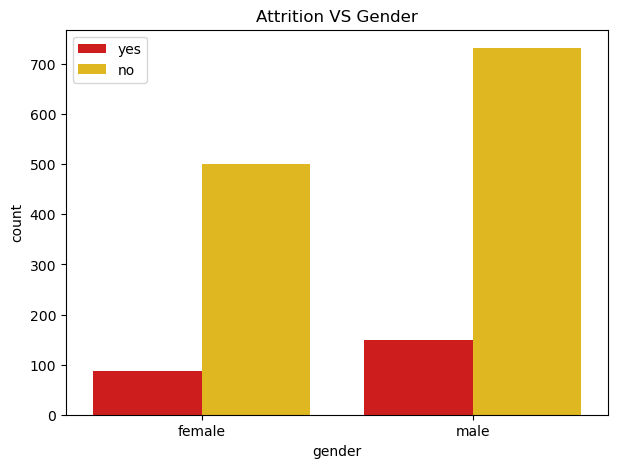

In [15]:
# Attrition with respect to the Gender
plt.figure(figsize=(7,5))
sns.countplot(x='gender',hue='attrition',data=df, palette='hot')
plt.title( 'Attrition VS Gender')
plt.legend(loc='best')
plt.show()

# This indicates that males are more likey to depart from their workplaces as compared to the women

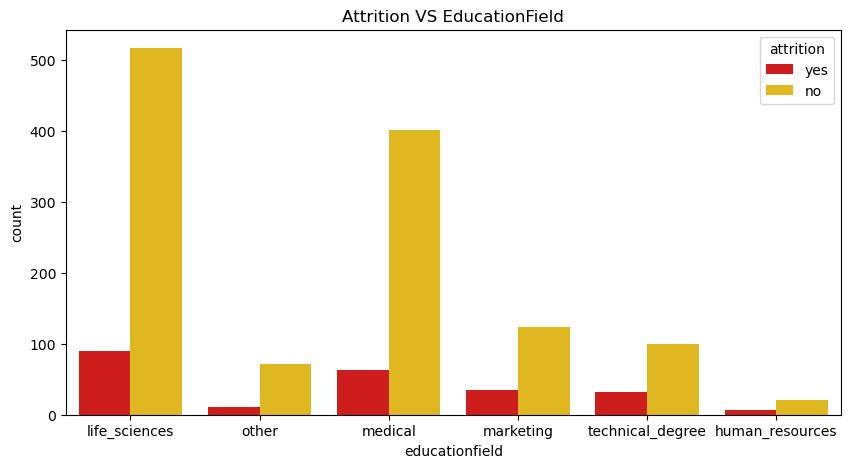

In [16]:
# Attrition with respect to the EducationField
plt.figure(figsize=(10,5))
sns.countplot(x='educationfield',hue='attrition',data=df, palette='hot')
plt.title( 'Attrition VS EducationField')
plt.show()

### Exploring the distribution of the target variable

In [17]:
# Converting attrition to numerical
df.attrition = (df.attrition == 'yes').astype(int)

In [18]:
df['attrition'].value_counts()

# This indicates that 237 employees left organizations either voluntarily or invouluntarily.

0    1233
1     237
Name: attrition, dtype: int64

In [19]:
# Getting the percentage of the count (Attrition Rate)
df.attrition.value_counts(normalize=True)

# This indicates that about 16% of employees are most likely to depart from work either voluntarily or involuntarily 

0    0.838776
1    0.161224
Name: attrition, dtype: float64

In [20]:
# Getting the attrition rate which is the same as percentage of attrition == yes
global_mean = df.attrition.mean()
round(global_mean, 3)

0.161

### Null Accuracy
Null Accuracy refers to the accuracy that could be achieved by always predicting the most frequent class

In [21]:
max(df.attrition.value_counts(normalize=True))

0.8387755102040816

### Encoding categorical variables
The categorical features were encoded using the DictVectorizer from sklearn.feature_extraction

In [22]:
from sklearn.feature_extraction import DictVectorizer

In [23]:
df[categorical].iloc[:10]

attrition     businesstravel              department educationfield  \
0          1      travel_rarely                   sales  life_sciences   
1          0  travel_frequently  research_&_development  life_sciences   
2          1      travel_rarely  research_&_development          other   
3          0  travel_frequently  research_&_development  life_sciences   
4          0      travel_rarely  research_&_development        medical   
5          0  travel_frequently  research_&_development  life_sciences   
6          0      travel_rarely  research_&_development        medical   
7          0      travel_rarely  research_&_development  life_sciences   
8          0  travel_frequently  research_&_development  life_sciences   
9          0      travel_rarely  research_&_development        medical   

   gender                    jobrole maritalstatus over18 overtime  
0  female            sales_executive        single      y      yes  
1    male         research_scientist       married      y       no  
2    male      laboratory_technician        single      y      yes  
3  female         research_scientist       married      y      yes  
4    male      laboratory_technician       married      y       no  
5    male      laboratory_technician        single      y       no  
6  female      laboratory_technician       married      y      yes  
7    male      laboratory_technician      divorced      y       no  
8    male     manufacturing_director        single      y       no  
9    male  healthcare_representative       married      y       no

In [24]:
to_dict = df[categorical + numerical].to_dict(orient='records')
to_dict[0]

{'attrition': 1,
 'businesstravel': 'travel_rarely',
 'department': 'sales',
 'educationfield': 'life_sciences',
 'gender': 'female',
 'jobrole': 'sales_executive',
 'maritalstatus': 'single',
 'over18': 'y',
 'overtime': 'yes',
 'age': 41,
 'dailyrate': 1102,
 'distancefromhome': 1,
 'education': 2,
 'employeecount': 1,
 'employeenumber': 1,
 'environmentsatisfaction': 2,
 'hourlyrate': 94,
 'jobinvolvement': 3,
 'joblevel': 2,
 'jobsatisfaction': 4,
 'monthlyincome': 5993,
 'monthlyrate': 19479,
 'numcompaniesworked': 8,
 'percentsalaryhike': 11,
 'performancerating': 3,
 'relationshipsatisfaction': 1,
 'standardhours': 80,
 'stockoptionlevel': 0,
 'totalworkingyears': 8,
 'trainingtimeslastyear': 0,
 'worklifebalance': 1,
 'yearsatcompany': 6,
 'yearsincurrentrole': 4,
 'yearssincelastpromotion': 0,
 'yearswithcurrmanager': 5}

In [25]:
dv = DictVectorizer(sparse=False)
data1 = dv.fit_transform(to_dict)
data1.shape

(1470, 56)

In [26]:
# Getting to see the entire columns inluding the encoded ones
# And they are indeed 56 in number
dv.get_feature_names_out()

array(['age', 'attrition', 'businesstravel=non-travel',
       'businesstravel=travel_frequently', 'businesstravel=travel_rarely',
       'dailyrate', 'department=human_resources',
       'department=research_&_development', 'department=sales',
       'distancefromhome', 'education', 'educationfield=human_resources',
       'educationfield=life_sciences', 'educationfield=marketing',
       'educationfield=medical', 'educationfield=other',
       'educationfield=technical_degree', 'employeecount',
       'employeenumber', 'environmentsatisfaction', 'gender=female',
       'gender=male', 'hourlyrate', 'jobinvolvement', 'joblevel',
       'jobrole=healthcare_representative', 'jobrole=human_resources',
       'jobrole=laboratory_technician', 'jobrole=manager',
       'jobrole=manufacturing_director', 'jobrole=research_director',
       'jobrole=research_scientist', 'jobrole=sales_executive',
       'jobrole=sales_representative', 'jobsatisfaction',
       'maritalstatus=divorced', 'marital

###  Feature Selection
Correlation is often used in machine learning to identify multicollinearity, which is when two or more predictor variables are highly correlated with each other. Multicollinearity can impact the accuracy of predictive models, thus the following features were removed since they were identified to be having a high multicollinearity (r >= 0.6):
* joblevel and totalworkingyears
* joblevel and monthlyincome
* age and totalworkingyears
* monthlyincome and totalworkingyears
* percentsalaryhike and performancerating
* totalworkingyears and yearsatcompany
* yearsatcompany and yearswithcurrmanager
* yearsincurrentrole and yearsatcompany
* yearsincurrentrole and yearswithcurrmanager
* yearsatcompany and yearssincelastpromotion

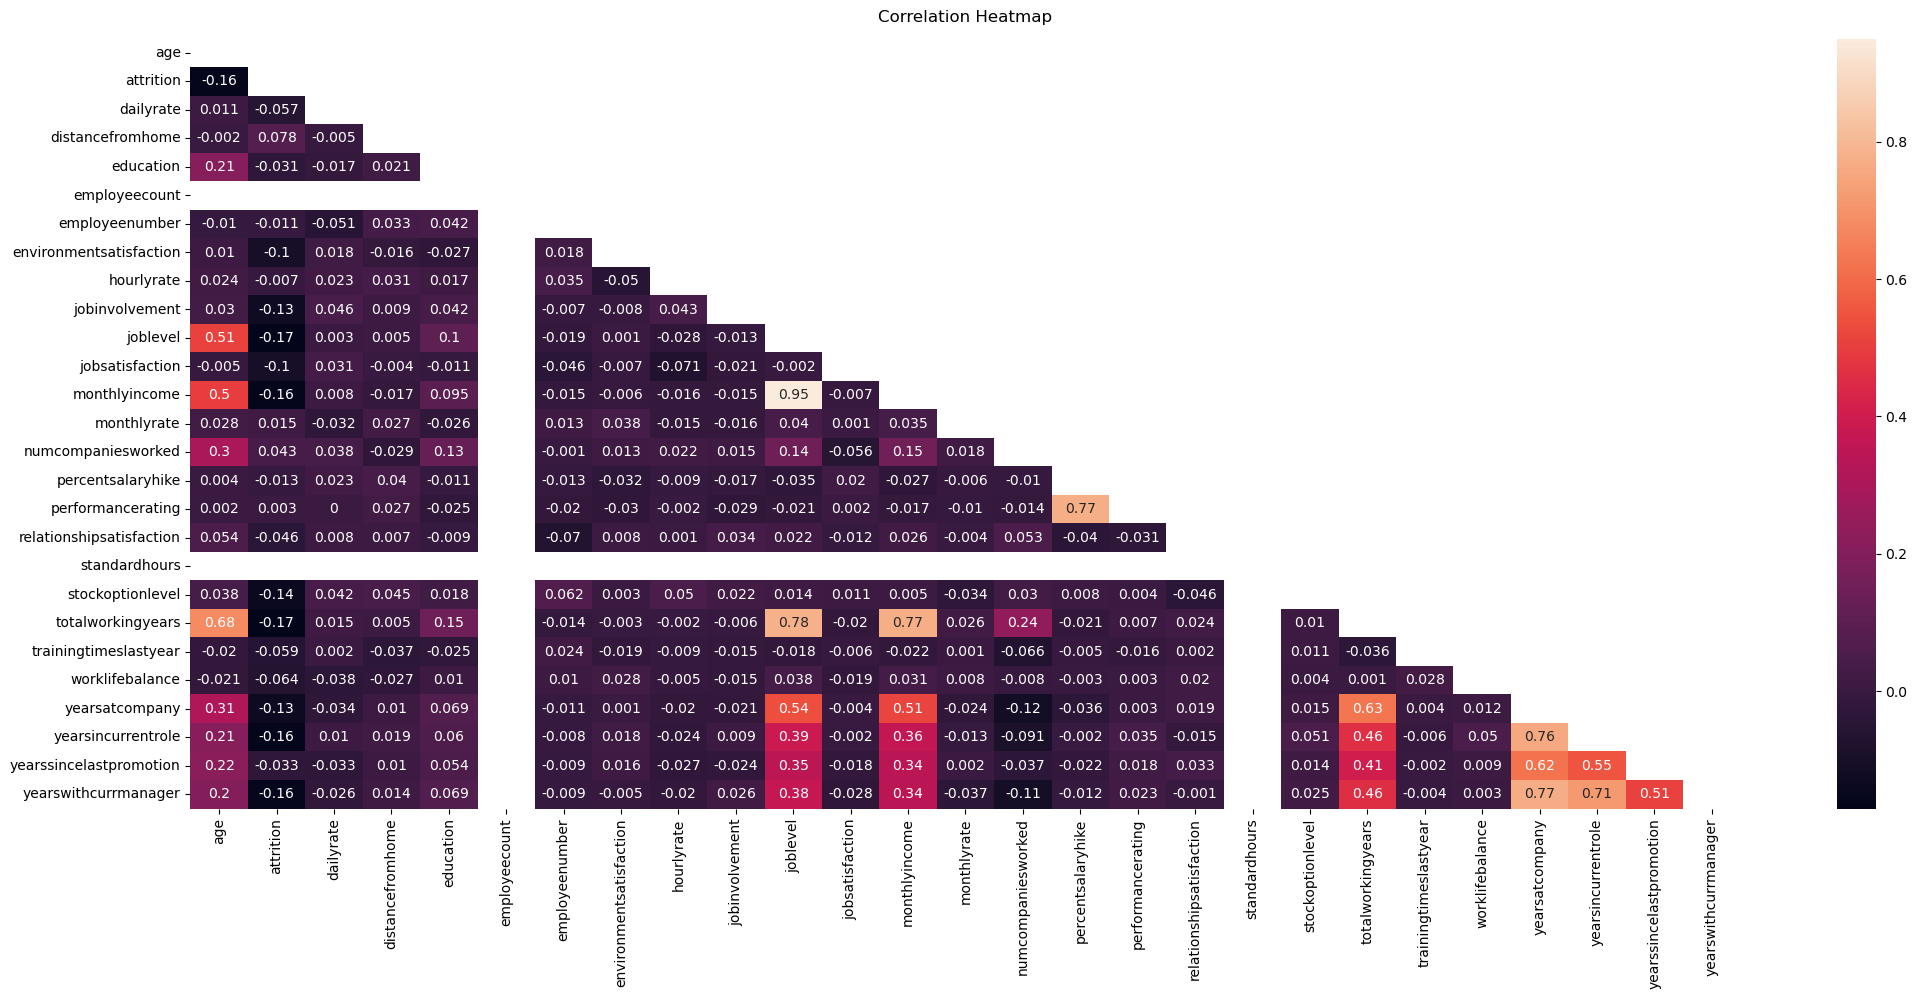

In [27]:
plt.figure(figsize=(25, 10))

mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr().round(3),mask=mask, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

plt.show()

### Model Building
The data was split into train and test dataset using the Scikit-learn library.The training dataset was futher divided into training and validation datasets so as to validate the model. The training, testing and validation comprised of 882, 294, 294 records

* ...to do

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [30]:
len(df_full_train), len(df_test), len(df_train), len(df_val)

(1176, 294, 882, 294)

In [31]:
# droppig default indices
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_full_train = df_full_train.reset_index(drop=True)

In [32]:
# The target variable vector
y_train = df_train.attrition.values
y_test = df_test.attrition.values
y_val = df_val.attrition.values

In [33]:
# Deleting out the target variable in the train and testing dataframe

del df_train['attrition']
del df_val['attrition']
del df_test['attrition']

### Decision Tree Algorithm
The model is built using the DecisionTreeClassifier. Firstly, the train and validation datasets whose length are 20% of the train_full dataset each were used to build the model. Secondly, the train_full and test datasets whose length are 80% and 20% respectively were used to build the same model.

#### 1. Using the train, and validation dataset first

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
train_dicts = df_train.to_dict(orient='records')

In [36]:
# dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [37]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [38]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [39]:
y_pred = dt.predict_proba(X_val)[:, 1]

In [40]:
y_train.sum()

136

### Evaluation of the Model
The evaluation metrics used included precision, recall, F1-score, and ROC-AUC. Precision metrics identifies how many positive predications turned out to be correct calculated as TF/(TP+FP). 

A precision of 0.25 indicates that, of all the employees predicted by the model to be leaving the company (positive predictions), only 25% of them are actually leaving the company according to the actual data. 

In other words, the model is making a lot of false positive predictions for employees who are not actually going to attrite while a recall value of 0.208 means that the model is only able to correctly identify approximately 20.8% of the actual positive instances, while the remaining 79.2% of positive instances are being incorrectly classified as negative (false negatives).

An F1 score of 0.22 typically indicates that the model is struggling to correctly classify positive instances while minimizing false positives.

A classification error of 0.26, often referred to as the misclassification rate, means that 26% of the model's predictions are incorrect. The low classification error

In [41]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score

In [42]:
print(metrics.confusion_matrix(y_val, y_pred))

[[204  37]
 [ 38  15]]


In [43]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred))

[[205  41]
 [ 37  11]]


In [44]:
accuracy_score(y_val, y_pred >= 0.5)

0.7448979591836735

In [45]:
# Confusion Table from scratch
true_positive = ((y_pred >= 0.5) & (y_val == 1)).sum()
false_positive = ((y_pred >= 0.5) & (y_val == 0)).sum()
false_negative = ((y_pred < 0.5) & (y_val == 1)).sum()
true_negative = ((y_pred < 0.5) & (y_val == 0)).sum()

In [46]:
confusion_table = np.array(
     # predict neg    pos
    [[true_negative, false_positive], # actual neg
     [false_negative, true_positive]]) # actual pos

confusion_table

array([[204,  37],
       [ 38,  15]])

In [47]:
confusion_table / confusion_table.sum()

array([[0.69387755, 0.12585034],
       [0.1292517 , 0.05102041]])

In [48]:
accuracy = ((true_positive + true_negative) / (true_negative + true_positive + false_negative + false_positive)).round(3)
precision = (true_positive / (true_positive + false_positive)).round(3)
recall = (true_positive / (true_positive + false_negative)).round(3)
f1_score = (2 * (precision * recall) / (precision + recall)).round(3)
accuracy, precision, recall, f1_score

(0.745, 0.288, 0.283, 0.285)

In [49]:
classification_error = (false_negative + false_positive)/(true_negative + true_positive + false_negative + false_positive)
classification_error

0.25510204081632654

In [51]:
roc_auc_score(y_val, y_pred)

0.5647459484850857

### Building a decision tree model without the highly correlated features
This is being done to resolve class imbalance

In [70]:
tri_df = df.corr().mask(mask)
tri_df

age  attrition  dailyrate  distancefromhome  \
age                            NaN        NaN        NaN               NaN   
attrition                -0.159205        NaN        NaN               NaN   
dailyrate                 0.010661  -0.056652        NaN               NaN   
distancefromhome         -0.001686   0.077924  -0.004985               NaN   
education                 0.208034  -0.031373  -0.016806          0.021042   
employeecount                  NaN        NaN        NaN               NaN   
employeenumber           -0.010145  -0.010577  -0.050990          0.032916   
environmentsatisfaction   0.010146  -0.103369   0.018355         -0.016075   
hourlyrate                0.024287  -0.006846   0.023381          0.031131   
jobinvolvement            0.029820  -0.130016   0.046135          0.008783   
joblevel                  0.509604  -0.169105   0.002966          0.005303   
jobsatisfaction          -0.004892  -0.103481   0.030571         -0.003669   
monthlyincome             0.497855  -0.159840   0.007707         -0.017014   
monthlyrate               0.028051   0.015170  -0.032182          0.027473   
numcompaniesworked        0.299635   0.043494   0.038153         -0.029251   
percentsalaryhike         0.003634  -0.013478   0.022704          0.040235   
performancerating         0.001904   0.002889   0.000473          0.027110   
relationshipsatisfaction  0.053535  -0.045872   0.007846          0.006557   
standardhours                  NaN        NaN        NaN               NaN   
stockoptionlevel          0.037510  -0.137145   0.042143          0.044872   
totalworkingyears         0.680381  -0.171063   0.014515          0.004628   
trainingtimeslastyear    -0.019621  -0.059478   0.002453         -0.036942   
worklifebalance          -0.021490  -0.063939  -0.037848         -0.026556   
yearsatcompany            0.311309  -0.134392  -0.034055          0.009508   
yearsincurrentrole        0.212901  -0.160545   0.009932          0.018845   
yearssincelastpromotion   0.216513  -0.033019  -0.033229          0.010029   
yearswithcurrmanager      0.202089  -0.156199  -0.026363          0.014406   

                          education  employeecount  employeenumber  \
age                             NaN            NaN             NaN   
attrition                       NaN            NaN             NaN   
dailyrate                       NaN            NaN             NaN   
distancefromhome                NaN            NaN             NaN   
education                       NaN            NaN             NaN   
employeecount                   NaN            NaN             NaN   
employeenumber             0.042070            NaN             NaN   
environmentsatisfaction   -0.027128            NaN        0.017621   
hourlyrate                 0.016775            NaN        0.035179   
jobinvolvement             0.042438            NaN       -0.006888   
joblevel                   0.101589            NaN       -0.018519   
jobsatisfaction           -0.011296            NaN       -0.046247   
monthlyincome              0.094961            NaN       -0.014829   
monthlyrate               -0.026084            NaN        0.012648   
numcompaniesworked         0.126317            NaN       -0.001251   
percentsalaryhike         -0.011111            NaN       -0.012944   
performancerating         -0.024539            NaN       -0.020359   
relationshipsatisfaction  -0.009118            NaN       -0.069861   
standardhours                   NaN            NaN             NaN   
stockoptionlevel           0.018422            NaN        0.062227   
totalworkingyears          0.148280            NaN       -0.014365   
trainingtimeslastyear     -0.025100            NaN        0.023603   
worklifebalance            0.009819            NaN        0.010309   
yearsatcompany             0.069114            NaN       -0.011240   
yearsincurrentrole         0.060236            NaN       -0.008416   
yearssincelastpromotion   

In [73]:
to_drop = [c for c in tri_df.columns if any(tri_df[c] >= 0.6)]
print(to_drop)

['age', 'joblevel', 'monthlyincome', 'percentsalaryhike', 'totalworkingyears', 'yearsatcompany', 'yearsincurrentrole']


In [75]:
reduced_df = df.drop(to_drop, axis=1)
reduced_df.head().T

0                       1  \
attrition                               1                       0   
businesstravel              travel_rarely       travel_frequently   
dailyrate                            1102                     279   
department                          sales  research_&_development   
distancefromhome                        1                       8   
education                               2                       1   
educationfield              life_sciences           life_sciences   
employeecount                           1                       1   
employeenumber                          1                       2   
environmentsatisfaction                 2                       3   
gender                             female                    male   
hourlyrate                             94                      61   
jobinvolvement                          3                       2   
jobrole                   sales_executive      research_scientist   
jobsatisfaction                         4                       2   
maritalstatus                      single                 married   
monthlyrate                         19479                   24907   
numcompaniesworked                      8                       1   
over18                                  y                       y   
overtime                              yes                      no   
performancerating                       3                       4   
relationshipsatisfaction                1                       4   
standardhours                          80                      80   
stockoptionlevel                        0                       1   
trainingtimeslastyear                   0                       3   
worklifebalance                         1                       3   
yearssincelastpromotion                 0                       1   
yearswithcurrmanager                    5                       7   

                                               2                       3  \
attrition                                      1                       0   
businesstravel                     travel_rarely       travel_frequently   
dailyrate                                   1373                    1392   
department                research_&_development  research_&_development   
distancefromhome                               2                       3   
education                                      2                       4   
educationfield                             other           life_sciences   
employeecount                                  1                       1   
employeenumber                                 4                       5   
environmentsatisfaction                        4                       4   
gender                                      male                  female   
hourlyrate                                    92                      56   
jobinvolvement                                 2                       3   
jobrole                    laboratory_technician      research_scientist   
jobsatisfaction                                3                       3   
maritalstatus                             single                 married   
monthlyrate                                 2396                   23159   
numcompaniesworked                             6                       1   
over18                                         y                       y   
overtime                                     yes                     yes   
performancerating                              3                       3   
relationshipsatisfaction                       2                       3   
standardhours                                 80                      80   
stockoptionlevel                               0                       0   
trainingtimeslastyear                          3                       3   
worklifebalance                                3              

In [76]:
df_full_train, df_test = train_test_split(reduced_df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [78]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_full_train = df_full_train.reset_index(drop=True)

In [79]:
# The target variable vector
y_train = df_train.attrition.values
y_test = df_test.attrition.values
y_val = df_val.attrition.values

In [80]:
# Deleting out the target variable in the train and testing dataframe

del df_train['attrition']
del df_val['attrition']
del df_test['attrition']

### Logistic Regression Algorithm

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Random Forest Algorithm

In [62]:
from sklearn.ensemble import RandomForestClassifier

#### 1. Using the train, and validation dataset first

In [63]:
from sklearn.metrics import roc_auc_score

In [64]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)

In [65]:
y_pred.shape, y_val.shape, y_train.shape

((294, 2), (294,), (882,))